# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('letters.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
data.shape

(20000, 17)

In [6]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

# Splitting the data

In [8]:
X = np.array(data)[:,1:]
y = np.array(data)[:,0]

In [10]:
X_train = X[:16000,:]
X_test = X[16001:,:]
y_train = y[:16000]
y_test = y[16001:]

In [11]:
X_train

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [8, 14, 7, ..., 7, 5, 8],
       [4, 7, 5, ..., 8, 5, 8],
       [2, 1, 3, ..., 9, 4, 10]], dtype=object)

# Building the SVM model

In [14]:
from sklearn import svm

In [17]:
model = svm.SVC(C = 3, gamma = 0.025)   # C = penalty of wrong classifications. gamma = measure of influence.

In [18]:
model.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [20]:
y_pred = model.predict(X_test)

In [36]:
def accuracy(y_test, predictions):
    
    correct = 0
    
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct = correct + 1
    print('The accuracy of our model is: {}'.format(float(correct/len(y_test)) * 100))
    #return (float(correct/len(y_test)) * 100)

In [37]:
accuracy(y_test,y_pred)

The accuracy is: 97.44936234058514


In [40]:
import string
labels = list(string.ascii_uppercase[0:26])
pred_labels =["Predicted "+s for s in labels]


In [46]:

from sklearn import metrics

matrix = metrics.confusion_matrix(y_test,y_pred, labels = labels)

<IPython.core.display.Javascript object>

<AxesSubplot:>

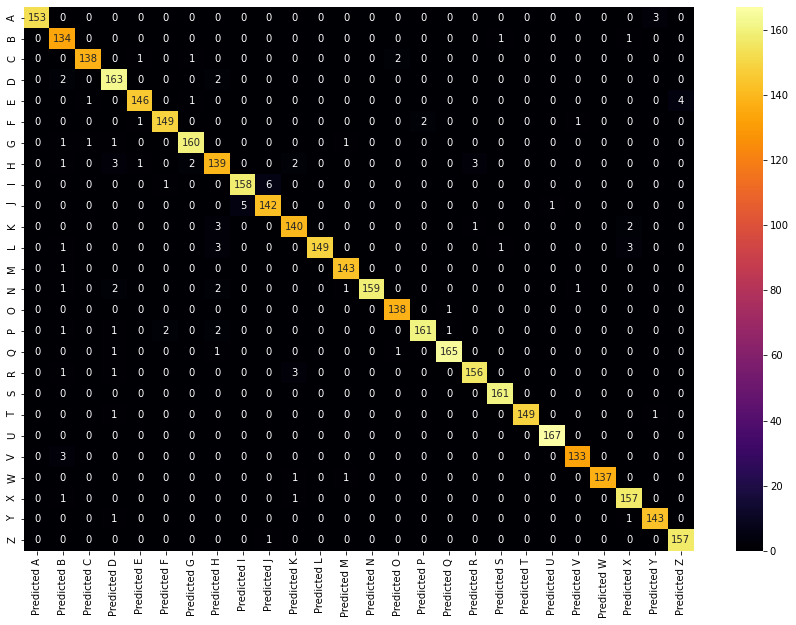

In [54]:
import seaborn as sns

UltimateMatrix = pd.DataFrame(matrix, index = [i for i in labels], columns = [i for i in pred_labels])
plt.figure(figsize = (15,10))
sns.heatmap(UltimateMatrix, annot = True, cmap = 'inferno', fmt = 'g')


# Our model performed quite well!